<a href="https://colab.research.google.com/github/Samuel-Schlemper-Schlemuel/Visualisador_de_visitas_de_pagina/blob/main/Visualisador_de_visitas_de_pagina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Chamando o DataFrame e manipulando os dados

In [77]:
df = pd.read_csv('/content/drive/MyDrive/Programação/Curso analise de dados do FreeCodeCamp/fcc-forum-pageviews.csv')

In [78]:
df[['years', 'months', 'days']] = df['date'].str.split('-', expand=True)

In [79]:
df[['years', 'months', 'days']] = df[['years', 'months', 'days']].astype(int)

In [80]:
df.set_index('date', inplace=True)

In [81]:
df.index = pd.to_datetime(df.index)

In [82]:
df_975 = df['value'].quantile(0.975)
df_025 = df['value'].quantile(0.025)
df = df[df['value'] <= df_975]
df = df[df['value'] >= df_025]

## Criando gráfico de linhas

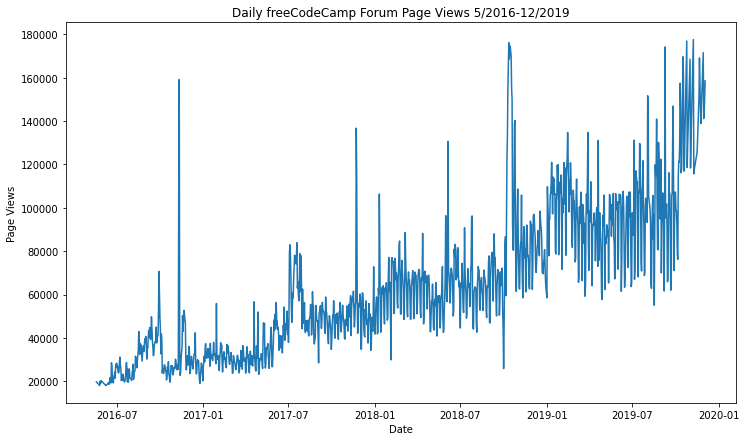

In [83]:
plt.figure(figsize = (12, 7))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.plot(df.index, df['value'])
plt.show()

## Criando um gráfico de barras

In [84]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']\

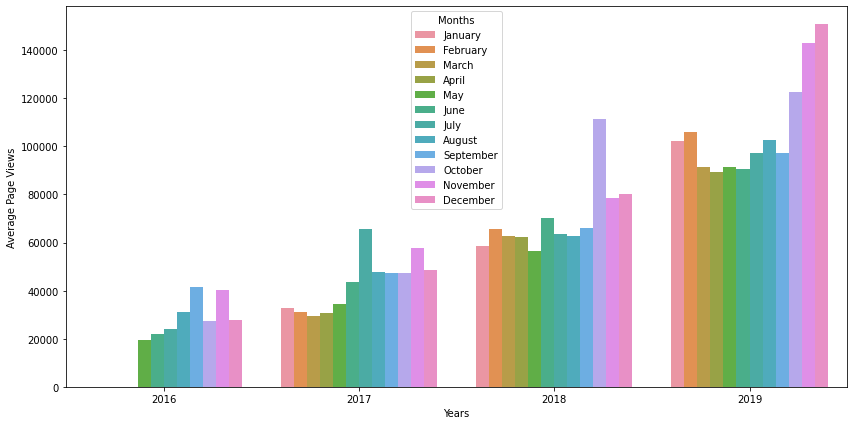

In [85]:
plt.figure(figsize = (14, 7))
sns.barplot(x=df['years'], y=df['value'], hue=df['months'], ci=None)
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(months, title='Months', prop={'size': 10})
plt.show()

## Criando um gráfico de caixa

In [86]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

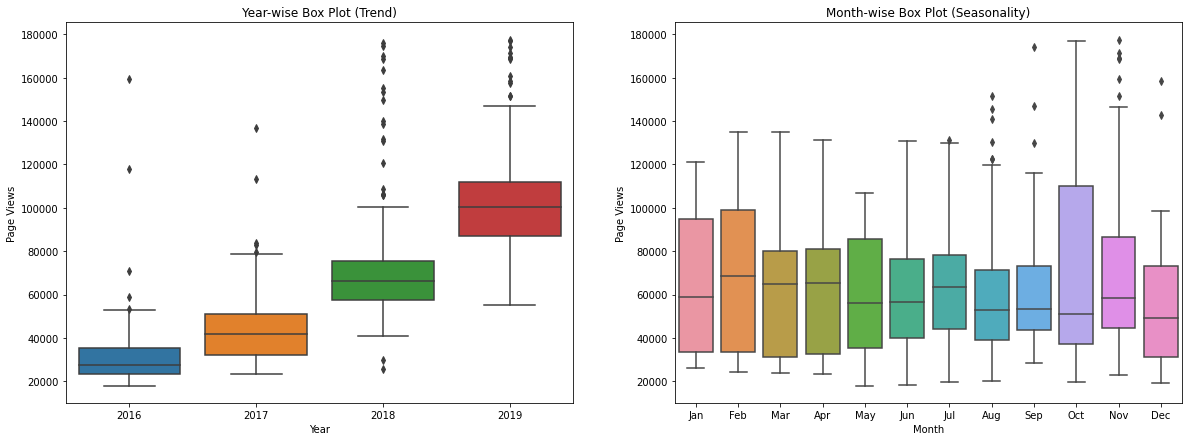

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
sns.boxplot(ax=axes[0], x='years', y='value', data=df)
sns.boxplot(ax=axes[1], x='months', y='value', data=df)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xticklabels(months)
plt.show()